In [10]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx

In [11]:
# a facebook mappába pakoljátok majd a fájlokat pls a projekten belül, azt nem rakom fel gitre
edge_path = 'facebook/0.edges'

## Load Data

In [12]:
# Beolvasom a fájlt
with open(edge_path, 'rt') as file:
    text = file.read()

# Feldolgozom a sorokat
connections = []
from_list = []
to_list = []
for row in text.split('\n')[:-1]:
    a, b = [int(x) for x in row.split(' ')]
    connections.append((a, b))

    from_list.append(a)
    to_list.append(b)

In [13]:
ids = set(from_list).union(set(to_list))
print(f'Smallest id: {min(ids)}')
print(f'Biggest id: {max(ids)}')
print(f'Count of ids: {len(ids)}')

Smallest id: 1
Biggest id: 347
Count of ids: 333


## Create Connection Matrix

In [14]:
# The graph edges are not continuous, so we need to map them to a continuous range
id_mapper = {}
reverse_id_mapper = {}
counter = 0
for elem in from_list:
    if elem not in id_mapper.values():
        id_mapper[counter] = elem
        reverse_id_mapper[elem] = counter
        counter += 1

for elem in to_list:
    if elem not in id_mapper.values():
        id_mapper[counter] = elem
        reverse_id_mapper[elem] = counter
        counter += 1

In [15]:
# Check whether the mapping is correct
array_size = max(reverse_id_mapper.keys())
A = np.zeros((array_size, array_size))

for first, second in connections:
    A[reverse_id_mapper[first], reverse_id_mapper[second]] = 1

# Csekkolom, hogy szimmetrikus-e, elméletileg annak kell lennie
is_symmetric = np.allclose(A, A.T)

if is_symmetric:
    print("The matrix is symmetric.")
else:
    print("The matrix is not symmetric.")

The matrix is symmetric.


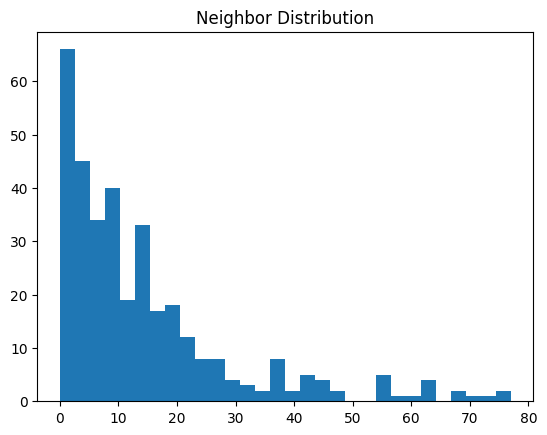

In [16]:
# Check the number of connections for each node
degrees = A.sum(axis = 0)

plt.hist(degrees, bins=30)
plt.title("Neighbor Distribution");

In [17]:
# Visualize the graph
def visualize_graph(graph):
    G = nx.Graph(graph)

    pos = nx.spring_layout(G)

    # Create edges and nodes
    edge_trace = go.Scatter(
        x=[],
        y=[],
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_trace = go.Scatter(
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            size=10,
        )
    )

    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])

    for node in G.nodes():
        x, y = pos[node]
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0,l=0,r=0,t=0)))

    fig.show()

visualize_graph(A)

# Legyen a végén egy hely a kérdéseknek, itt tudunk üzenni egymásnak

- Miért van 10 fajta fájl prefix? (0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980), Szerintem ez a kapcsolattípusokat különbözteti meg
- A featnames-nek mi lehet a felépítése szerintetek? Az utolsó érték nagyon zavarossá teszi Számomra